### Part 1: Exploratory Data Analysis

In [1]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
# read login file
df_login = pd.read_json('logins.json')
df_login

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
# preliminary glance at dataset
df_login.describe(include='all')

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


We see a time range of 3 and a half months, starting at 01/01/1970 until 04/13/1970. Close to 1,000 logins have the same timestamp as another login. It appears that the logins are not exactly sorted chronologically; for example, the fourth row is earlier than the third row. 

In [4]:
# Goal: Aggregate login counts by 15-minute intervals
# Start by setting the index to the timestamp
df_login = df_login.set_index('login_time')
df_login.head(5)

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [5]:
# Sort the index
df_login.sort_index(inplace=True)
df_login.head()

""
login_time
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37


In [6]:
# Create column to hold login counts
df_login['count'] = 1

In [7]:
# Use .resample and .sum to create a count of logins in 15-minute interval
login_count = df_login.resample('15T').sum()
login_count

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


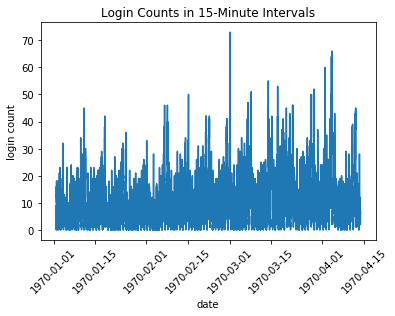

In [8]:
# visualize
plt.plot(login_count)
plt.xticks(rotation=45) # rotate xticks to make them more legible
plt.xlabel('date')
plt.ylabel('login count')
plt.title('Login Counts in 15-Minute Intervals')
plt.show()

We can already start to see some trends in the data. For instance, in January we see two peaks of logins around the middle of the month. Let's examine this further.

In [9]:
# Extract features from timestamps
# Data can be resampled for any of these intervals, but we'll focus on monthly, weekly, and daily cycles
df_login = df_login.reset_index() # Must reset index in order to use .apply on timestamps
df_login['month'] = df_login['login_time'].apply(lambda x: x.month)
df_login['day'] = df_login['login_time'].apply(lambda x: x.day)
df_login['hour'] = df_login['login_time'].apply(lambda x: x.hour)
df_login['weekday'] = df_login['login_time'].apply(lambda x: x.weekday())
df_login.head()

,login_time,count,month,day,hour,weekday
0,1970-01-01 20:12:16,1,1,1,20,3
1,1970-01-01 20:13:18,1,1,1,20,3
2,1970-01-01 20:16:10,1,1,1,20,3
3,1970-01-01 20:16:36,1,1,1,20,3
4,1970-01-01 20:16:37,1,1,1,20,3


In [10]:
# Let's start by looking at trends in Janaury
# Set timestamps to index, sort, then slice
df_login = df_login.set_index('login_time').sort_index()
df_jan = df_login['1970-01-01' : '1970-01-31']
df_jan.head()

,count,month,day,hour,weekday
login_time,,,,,
1970-01-01 20:12:16,1,1,1,20,3
1970-01-01 20:13:18,1,1,1,20,3
1970-01-01 20:16:10,1,1,1,20,3
1970-01-01 20:16:36,1,1,1,20,3
1970-01-01 20:16:37,1,1,1,20,3


In [11]:
# resample by day, extract weekday
login_count_daily_jan = df_jan.resample('D')['count'].sum()
login_count_daily_jan = login_count_daily_jan.reset_index()
login_count_daily_jan['weekday'] = login_count_daily_jan['login_time'].apply(lambda x: x.weekday())
login_count_daily_jan['day'] = login_count_daily_jan['login_time'].apply(lambda x: x.day)
login_count_daily_jan

,login_time,count,weekday,day
0,1970-01-01,112,3,1
1,1970-01-02,681,4,2
2,1970-01-03,793,5,3
3,1970-01-04,788,6,4
4,1970-01-05,459,0,5
5,1970-01-06,536,1,6
6,1970-01-07,648,2,7
7,1970-01-08,625,3,8
8,1970-01-09,881,4,9
9,1970-01-10,1054,5,10


In [12]:
# convert weekdays to actual names
weekday_dict = {0 : 'Monday',
               1 : 'Tuesday',
               2 : 'Wednesday',
               3 : 'Thursday',
               4 : 'Friday', 
               5 : 'Saturday',
               6 : 'Sunday'}
login_count_daily_jan['weekday_name'] = login_count_daily_jan['weekday'].map(weekday_dict)
login_count_daily_jan

,login_time,count,weekday,day,weekday_name
0,1970-01-01,112,3,1,Thursday
1,1970-01-02,681,4,2,Friday
2,1970-01-03,793,5,3,Saturday
3,1970-01-04,788,6,4,Sunday
4,1970-01-05,459,0,5,Monday
5,1970-01-06,536,1,6,Tuesday
6,1970-01-07,648,2,7,Wednesday
7,1970-01-08,625,3,8,Thursday
8,1970-01-09,881,4,9,Friday
9,1970-01-10,1054,5,10,Saturday


Text(0.5, 1.0, 'Login Counts for January')

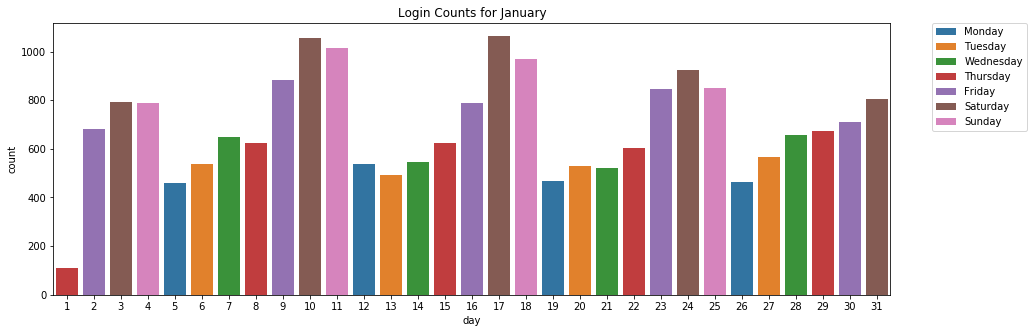

In [13]:
# graph counts of january by day
plt.rcParams['figure.figsize'] = (15, 5) # set figure size within Jupyter
hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
    # create proper order of days for legend
sns.barplot(x='day', y='count', data=login_count_daily_jan, hue='weekday_name', hue_order=hue_order, dodge=False)
    # setting dodge to false makes bars wider
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # moves legend to outside graph
plt.title('Login Counts for January')

Unsurprisingly, we see higher usage on the weekends. Usage also plateaued in the middle of the month, which we saw in the overall trends. The first day of the month is much lower because the data only starts at 8PM for that day.

Text(0.5, 1.0, 'Login Counts for February')

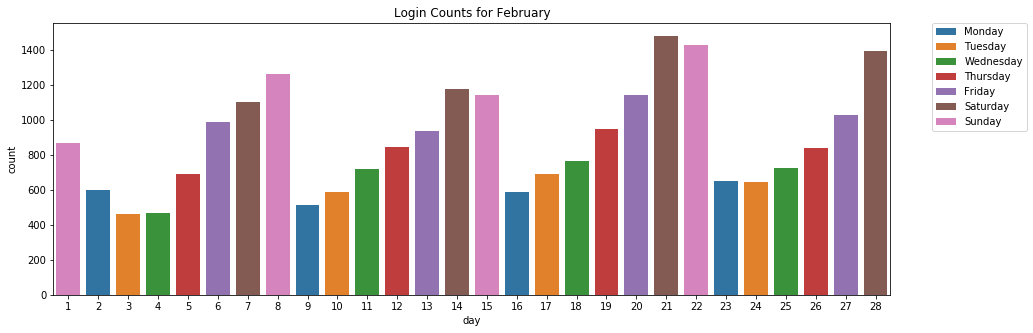

In [14]:
# repeat the process for February
df_feb = df_login['1970-02-01' : '1970-02-28']
login_count_daily_feb = df_feb.resample('D')['count'].sum()
login_count_daily_feb = login_count_daily_feb.reset_index()
login_count_daily_feb['weekday'] = login_count_daily_feb['login_time'].apply(lambda x: x.weekday())
login_count_daily_feb['day'] = login_count_daily_feb['login_time'].apply(lambda x: x.day)
login_count_daily_feb['weekday_name'] = login_count_daily_feb['weekday'].map(weekday_dict)
sns.barplot(x='day', y='count', data=login_count_daily_feb, hue='weekday_name', hue_order=hue_order, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Login Counts for February')

Text(0.5, 1.0, 'Login Counts for March')

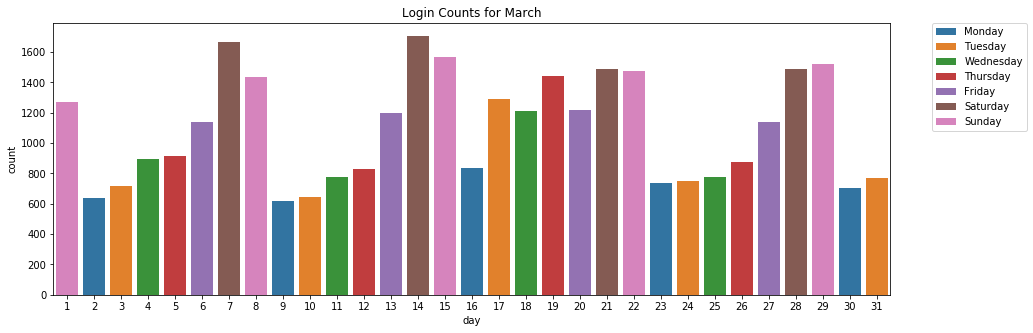

In [15]:
# and for March
df_mar = df_login['1970-03-01' : '1970-03-31']
login_count_daily_mar = df_mar.resample('D')['count'].sum()
login_count_daily_mar = login_count_daily_mar.reset_index()
login_count_daily_mar['weekday'] = login_count_daily_mar['login_time'].apply(lambda x: x.weekday())
login_count_daily_mar['day'] = login_count_daily_mar['login_time'].apply(lambda x: x.day)
login_count_daily_mar['weekday_name'] = login_count_daily_mar['weekday'].map(weekday_dict)
sns.barplot(x='day', y='count', data=login_count_daily_mar, hue='weekday_name', hue_order=hue_order, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Login Counts for March')

Text(0.5, 1.0, 'Login Counts for April')

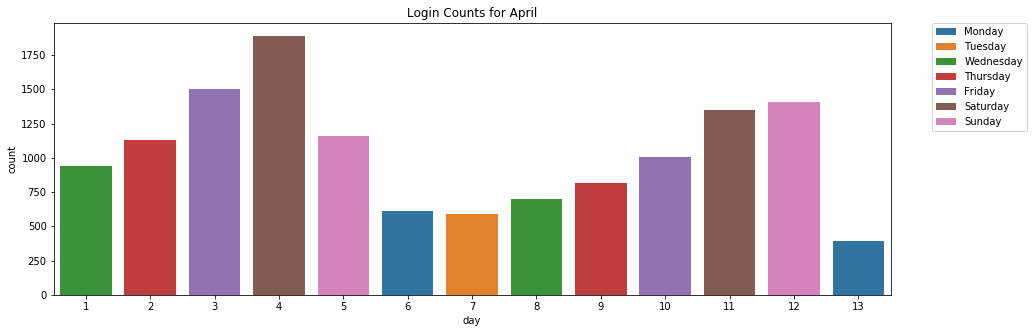

In [16]:
# and of course, April, of which we only have half
df_apr = df_login['1970-04-01' : '1970-04-13']
login_count_daily_apr = df_apr.resample('D')['count'].sum()
login_count_daily_apr = login_count_daily_apr.reset_index()
login_count_daily_apr['weekday'] = login_count_daily_apr['login_time'].apply(lambda x: x.weekday())
login_count_daily_apr['day'] = login_count_daily_apr['login_time'].apply(lambda x: x.day)
login_count_daily_apr['weekday_name'] = login_count_daily_apr['weekday'].map(weekday_dict)
sns.barplot(x='day', y='count', data=login_count_daily_apr, hue='weekday_name', hue_order=hue_order, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Login Counts for April')

[Text(0, 0, ''),
 Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April')]

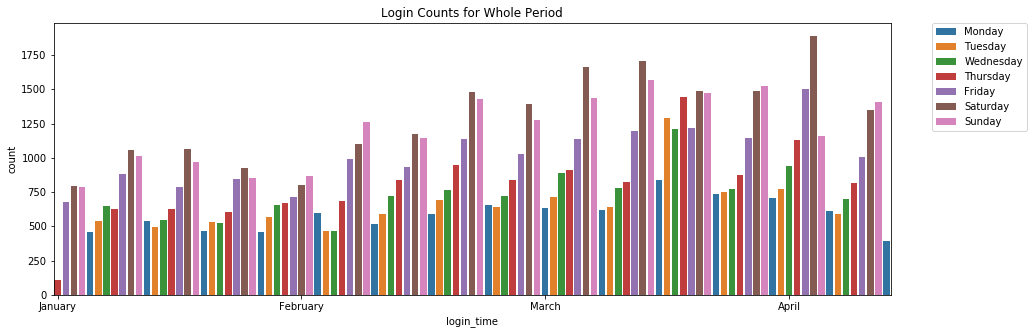

In [17]:
# then daily counts for the entire period
df_daily = df_login.resample('D')['count'].sum()
df_daily = df_daily.reset_index()
df_daily['weekday'] = df_daily['login_time'].apply(lambda x: x.weekday())
df_daily['weekday_name'] = df_daily['weekday'].map(weekday_dict)

fig, ax = plt.subplots()

fig = sns.barplot(x='login_time', y='count', data=df_daily, hue='weekday_name', hue_order=hue_order, dodge=False, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Login Counts for Whole Period')


ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_xticklabels(['', 'January', 'February', 'March', 'April'])

In [18]:
# look at data numerically
df_login.groupby('month')['count'].sum()

month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64

Text(0.5, 1.0, 'Hourly Login Counts for January')

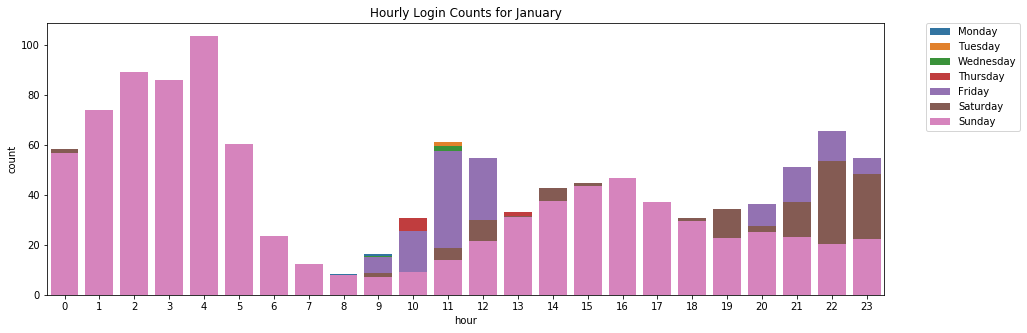

In [19]:
# let's look at some hourly trends as well
login_count_hourly_jan = df_jan.resample('H')['count'].sum()
login_count_hourly_jan = login_count_hourly_jan.reset_index()
login_count_hourly_jan['hour'] = login_count_hourly_jan['login_time'].apply(lambda x: x.hour)
login_count_hourly_jan['day'] = login_count_hourly_jan['login_time'].apply(lambda x: x.day)
login_count_hourly_jan['weekday'] = login_count_hourly_jan['login_time'].apply(lambda x: x.weekday())
login_count_hourly_jan['weekday_name'] = login_count_hourly_jan['weekday'].map(weekday_dict)
sns.barplot(x='hour', y='count', data=login_count_hourly_jan, hue='weekday_name', hue_order=hue_order, dodge=False, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Hourly Login Counts for January')

In [20]:
df_jan.groupby('hour')['count'].sum().sort_values(ascending=False)

hour
22    1442
2     1431
1     1400
0     1385
11    1364
23    1297
12    1267
21    1192
3     1110
4     1080
13     877
14     813
20     813
15     768
16     735
5      669
10     662
19     629
18     627
17     602
9      379
6      286
7      208
8      203
Name: count, dtype: int64

In [21]:
# check the ratio of late logins to total logins
late = (df_jan['hour'] >= 20) | (df_jan['hour'] <= 4)
df_jan[late]['count'].sum() / df_jan['count'].sum()

0.5249776354818965

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Login Counts for January by Weekday')

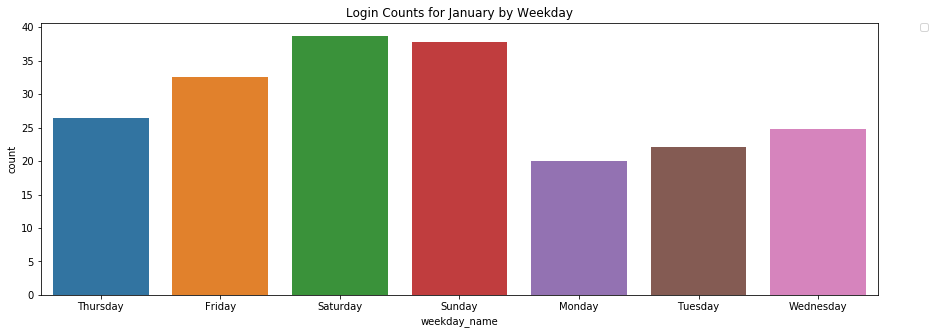

In [22]:
# quick view by weekday
sns.barplot(x='weekday_name', y='count', data=login_count_hourly_jan, dodge=False, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Login Counts for January by Weekday')

In [23]:
df_jan['weekday_name'] = df_jan['weekday'].map(weekday_dict)
df_jan.groupby('weekday_name')['count'].sum().sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


weekday_name
Saturday     4642
Friday       3907
Sunday       3625
Thursday     2640
Wednesday    2375
Tuesday      2124
Monday       1926
Name: count, dtype: int64

Higher login rates on the weekend are consistent for all months. Rates were generally on an upward trend from January to early April, but may have tapered off at the end of April (difficult to tell without more data). Additionally, the majority of logins happened between 8PM and 4AM in January, showing people tend to use the website/application late at night. 

### Part 2: Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


Answer 1: The most direct way of measuring the experiment would be the percent of time a driver spends in each city respectively; if the experiment were an absolute success, the drivers would spend 50% of the time in one city and 50% in the other. Other more indirect metrics could be revenue (how much did the experiment affect local business?) or rating (how do people feel about the experiment?).

Answer 2: 
One experimental design choice is to do an A/B test: start by creating a test group, who receives the toll reimbursement, and a control group, who continues as before. Measure the difference in percent of time the drives spend in each city. Run the experiment for at least several weeks, and preferably a whole year to make it easier to detrend the data and examine the base behavior in question. If we know the actual statistics (most importantly, standard deviation) of the entire driver population, we can do a z-test; otherwise, a t-test would be beter. This test should be one-tailed, because we're computing the percent of control drivers with a time difference equal to or smaller than the test group. The null hypothesis is that the two groups are statistically equivalent, while the alternative hypothesis is that the control difference is larger than the test difference. If the percent of riders with a smaller time difference is under the standard significance level of 5%, then the test can be considered a success and the toll reimbursement did indeed encourage drivers to split their time more evenly. If it is larger, then the experiment does not prove there is a significant difference between reimbursing or not, so the city should consider other measures. 

### Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [24]:
# load data
df_users = pd.read_json('ultimate_data_challenge.json')
df_users

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [25]:
# get descriptive statistics
df_users.describe(include='all')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,50000,50000.000000,50000,41878.000000,50000.000000,50000,49604,50000.000000,50000,50000.000000,50000.000000,49799.000000
unique,3,NaN,31,NaN,NaN,182,2,NaN,2,NaN,NaN,NaN
top,Winterfell,NaN,2014-01-18,NaN,NaN,2014-06-29,iPhone,NaN,False,NaN,NaN,NaN
freq,23336,NaN,2948,NaN,NaN,2036,34582,NaN,31146,NaN,NaN,NaN
mean,NaN,2.278200,NaN,4.601559,1.074764,NaN,NaN,8.849536,NaN,60.926084,5.796827,4.778158
std,NaN,3.792684,NaN,0.617338,0.222336,NaN,NaN,19.958811,NaN,37.081503,5.707357,0.446652
min,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,NaN,0.000000,NaN,4.300000,1.000000,NaN,NaN,0.000000,NaN,33.300000,2.420000,4.700000
50%,NaN,1.000000,NaN,4.900000,1.000000,NaN,NaN,0.000000,NaN,66.700000,3.880000,5.000000
75%,NaN,3.000000,NaN,5.000000,1.050000,NaN,NaN,8.600000,NaN,100.000000,6.940000,5.000000


Drivers tend to leave higher ratings than their passengers, although not by much, with mean values of 4.78 and 4.60. These distributions are both clearly negatively skewed, as the medians are higher than the means and close to the max value of 5.

Three columns have NaN's: avg_rating_of_driver, phone, and avg_rating_by_driver. Of these, rating of driver has the most. Clearly a significant percentage of users do not leave ratings for their drivers.

Because this data will be used in a machine learning model, we will need to impute these missing values in some way. Let's start by looking at the distributions.

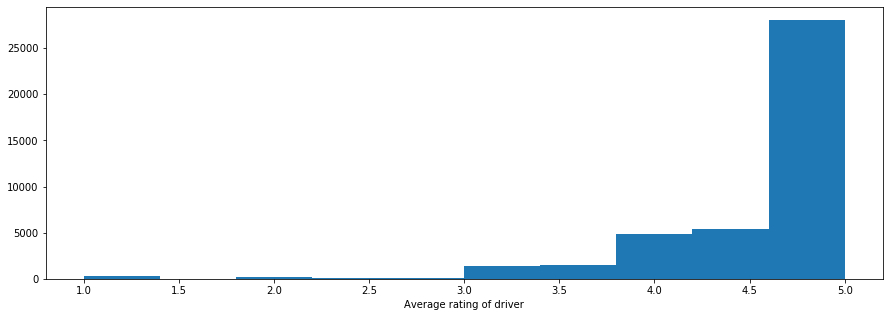

In [26]:
plt.hist(df_users['avg_rating_of_driver'].dropna())
plt.xlabel('Average rating of driver')
plt.show()

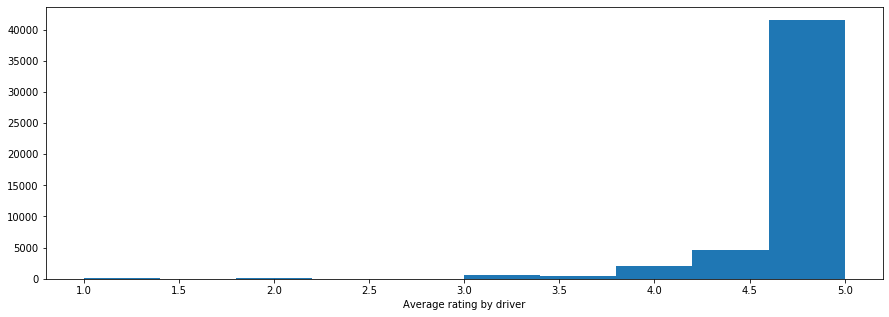

In [27]:
plt.hist(df_users['avg_rating_by_driver'].dropna())
plt.xlabel('Average rating by driver')
plt.show()

For numerical data, there are several methods to fill missing values. Most commonly these values are replaced with some aggregate of the data, usually either the mean or median. Although these distributions do technically have outliers, which would indicate the median might be better to use, the range of values is small and I would like to preserve the mean.
Alternatively, a regression model could be trained to predict these missing values.

In [28]:
# fill NaN's
df_users['avg_rating_of_driver'] = df_users['avg_rating_of_driver'].fillna(df_users['avg_rating_of_driver'].mean())
df_users['avg_rating_by_driver'] = df_users['avg_rating_by_driver'].fillna(df_users['avg_rating_by_driver'].mean())
df_users.describe(include='all')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,50000,50000.000000,50000,50000.000000,50000.000000,50000,49604,50000.000000,50000,50000.000000,50000.000000,50000.000000
unique,3,NaN,31,NaN,NaN,182,2,NaN,2,NaN,NaN,NaN
top,Winterfell,NaN,2014-01-18,NaN,NaN,2014-06-29,iPhone,NaN,False,NaN,NaN,NaN
freq,23336,NaN,2948,NaN,NaN,2036,34582,NaN,31146,NaN,NaN,NaN
mean,NaN,2.278200,NaN,4.601559,1.074764,NaN,NaN,8.849536,NaN,60.926084,5.796827,4.778158
std,NaN,3.792684,NaN,0.564977,0.222336,NaN,NaN,19.958811,NaN,37.081503,5.707357,0.445753
min,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,NaN,0.000000,NaN,4.500000,1.000000,NaN,NaN,0.000000,NaN,33.300000,2.420000,4.700000
50%,NaN,1.000000,NaN,4.700000,1.000000,NaN,NaN,0.000000,NaN,66.700000,3.880000,5.000000
75%,NaN,3.000000,NaN,5.000000,1.050000,NaN,NaN,8.600000,NaN,100.000000,6.940000,5.000000


<BarContainer object of 2 artists>

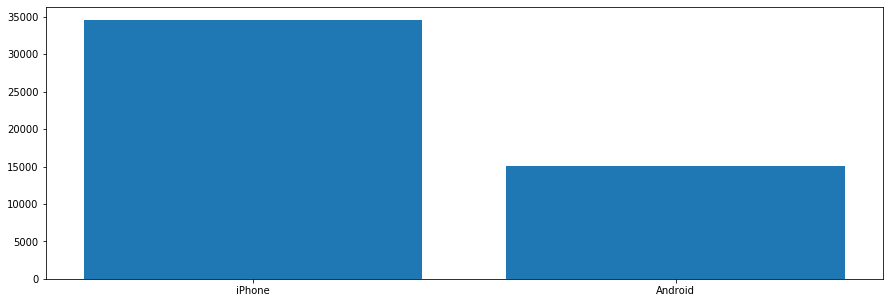

In [29]:
# look at phone counts
phone_counts = df_users.phone.dropna().value_counts()
plt.bar(x = phone_counts.index, height = phone_counts)

While numerical features are often imputed with the median or mean, categorical features often use the mode, or most frequent value. However, it might be important that this value is missing. I'll fill with "Unknown" and let the machine learning model we'll eventually build decide if this information is important. 

A classifier could be fit to the data and predict phone labels as well.

In [30]:
df_users['phone'] = df_users['phone'].fillna('Unknown')
df_users.describe(include='all')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,50000,50000.000000,50000,50000.000000,50000.000000,50000,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000
unique,3,NaN,31,NaN,NaN,182,3,NaN,2,NaN,NaN,NaN
top,Winterfell,NaN,2014-01-18,NaN,NaN,2014-06-29,iPhone,NaN,False,NaN,NaN,NaN
freq,23336,NaN,2948,NaN,NaN,2036,34582,NaN,31146,NaN,NaN,NaN
mean,NaN,2.278200,NaN,4.601559,1.074764,NaN,NaN,8.849536,NaN,60.926084,5.796827,4.778158
std,NaN,3.792684,NaN,0.564977,0.222336,NaN,NaN,19.958811,NaN,37.081503,5.707357,0.445753
min,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,NaN,0.000000,NaN,4.500000,1.000000,NaN,NaN,0.000000,NaN,33.300000,2.420000,4.700000
50%,NaN,1.000000,NaN,4.700000,1.000000,NaN,NaN,0.000000,NaN,66.700000,3.880000,5.000000
75%,NaN,3.000000,NaN,5.000000,1.050000,NaN,NaN,8.600000,NaN,100.000000,6.940000,5.000000


In [31]:
# check data types of features
df_users.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

Columns holding dates may have to be converted to datetime objects. 

In [32]:
# what percent of users took an uber black in the first 30 days?
df_users['ultimate_black_user'].sum() / len(df_users)

0.37708

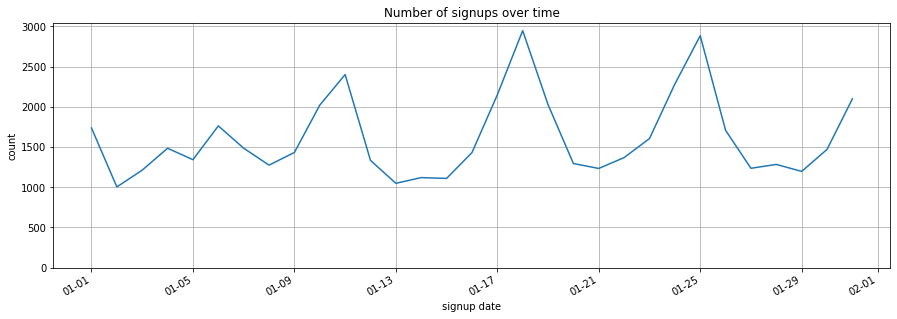

In [33]:
# graph number of signups over time (within January)
signups_over_time = df_users.groupby('signup_date')['city'].count()

signups_over_time.index = pd.to_datetime(signups_over_time.index) # ensure index is datetime object for proper reading

months_fmt = dates.DateFormatter('%m-%d') # create proper date format

fig, ax = plt.subplots()

ax.plot(signups_over_time)

ax.xaxis_date() # tells matplotlib it's working with datetime objects
ax.xaxis.set_major_formatter(months_fmt) # set proper format
ax.grid(True) # because it makes the graph easier to read


ax.set_xlabel('signup date')
ax.set_ylabel('count')
ax.set_title('Number of signups over time')
ax.set_ylim(0)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [34]:
signups_over_time = pd.DataFrame(signups_over_time)
signups_over_time = signups_over_time.reset_index()
signups_over_time['signup_date'] = pd.to_datetime(signups_over_time['signup_date'])
signups_over_time['weekday_name'] = signups_over_time['signup_date'].apply(lambda x: x.weekday()).map(weekday_dict)
signups_over_time = signups_over_time.rename(columns={'city' : 'count'})
signups_over_time

,signup_date,count,weekday_name
0,2014-01-01,1737,Wednesday
1,2014-01-02,1004,Thursday
2,2014-01-03,1213,Friday
3,2014-01-04,1485,Saturday
4,2014-01-05,1343,Sunday
5,2014-01-06,1763,Monday
6,2014-01-07,1486,Tuesday
7,2014-01-08,1275,Wednesday
8,2014-01-09,1433,Thursday
9,2014-01-10,2021,Friday


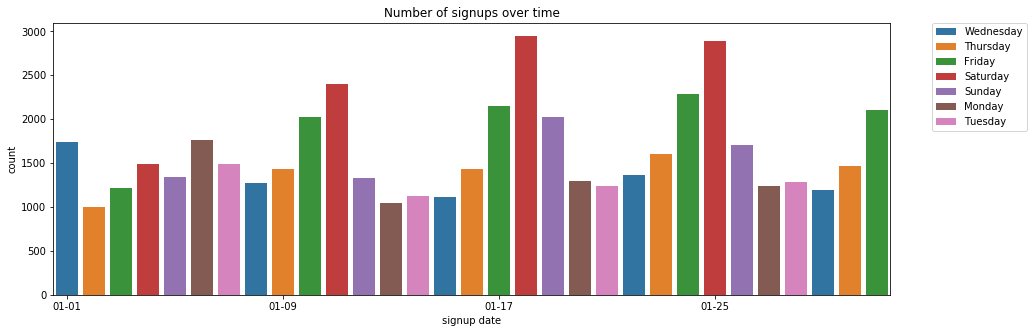

In [35]:
# regraph 
signups_over_time['signup_date'] = pd.to_datetime(signups_over_time['signup_date'])

months_fmt = dates.DateFormatter('%m-%d') # create proper date format

fig, ax = plt.subplots()
fig = sns.barplot(x='signup_date', y='count', data=signups_over_time, hue='weekday_name', dodge=False)

ax.set_xlabel('signup date')
ax.set_ylabel('count')
ax.set_title('Number of signups over time')
ax.set_ylim(0)

ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_xticklabels(['', '01-01', '01-09', '01-17', '01-25'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [36]:
signups_over_time.groupby('weekday_name')['count'].sum().sort_values(ascending=False)

weekday_name
Friday       9767
Saturday     9720
Thursday     6945
Wednesday    6688
Sunday       6413
Monday       5343
Tuesday      5124
Name: count, dtype: int64

The most common date for people to sign up is Friday, followed by Saturday. 

In [37]:
# what is the latest trip date?
max(df_users.last_trip_date)

'2014-07-01'

Users are considered "retained" if they have used the service since 06/01/14.

In [38]:
# if the user is retained, give them a label of 1; otherwise, 0
df_users['retained'] = np.where(df_users['last_trip_date'] >= '2014-06-01', 1, 0)
df_users

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [39]:
# get percent of retained users
print('Percent of retained users: {:.2f}'.format(df_users['retained'].mean()*100))

Percent of retained users: 37.61


### Building a model

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097,0.210463
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660,-0.010829
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498,-0.003333
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964,0.011797
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328,0.205002
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366,0.009693
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793,-0.092780
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000,-0.026748
retained,0.210463,-0.010829,-0.003333,0.011797,0.205002,0.009693,-0.092780,-0.026748,1.000000


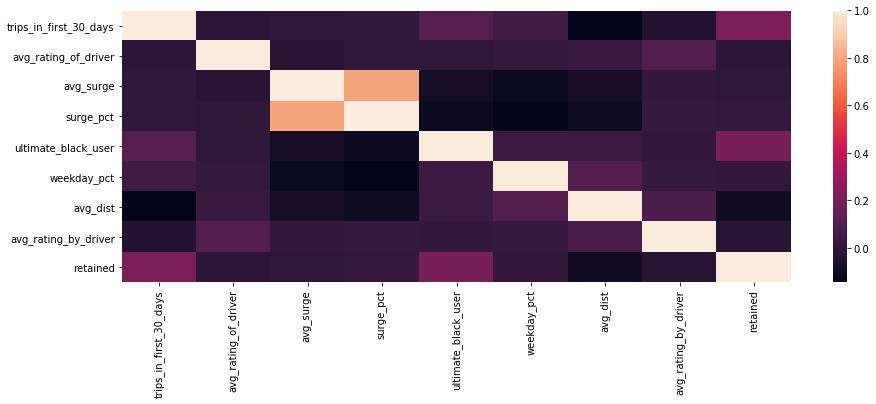

In [40]:
# let's look at the correlation between features with a correlation matrix and heatmap

correlation_matrix = df_users.corr()
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values, yticklabels=correlation_matrix.columns.values)
correlation_matrix

Interestingly, whether or not someone is retained is significantly positively correlated with the number of trips in the first 30 days and whether they used ultimate black in this same period. It seems the first month is crucial to retaining users.

Unsurprisingly, avg_surge and surge_pct are highly correlated. We'll keep these features for now, but if the model is unstable, we'll test if this multicolinearity is the cause.

Signup date and last trip date should both be dropped, a) because of issues with inherent correlation of timestamped features, and b) because 'retained' was computed from last trip date.

In [41]:
df_users = df_users.drop(['signup_date', 'last_trip_date'], axis=1)

Time to train our models! I'm going to use a couple different types of classifiers.
The target variable is 'retained'. 
Normally, categorical variables cannot be used as features in sklearn's models. However, these features can be converted to binary numericals via one hot encoding. Pandas' get_dummies function does the job for us.

For metrics, the most basic is accuracy. I personally prefer F1 score, which is the harmonic mean of precision and recall. In cases of class imbalance, accuracy can be misleading (further below). We already know this dataset has a class imbalance, as only 37% of users are considered retained. We'll also be using the area under the ROC curve as an evaluation metric because it, like F1, is good at measuruing precision and recall. Both of these metrix max out at 1.

In [42]:
# import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [43]:
# start with the simplest algorithm, logistic regression
target = ['retained']
dummies = ['city', 'phone']

Xy = df_users
Xy = pd.get_dummies(Xy, columns=dummies, drop_first=True)
Xy = Xy.dropna() 

# define x and y as features and targets, then split
y = Xy[target]
features = [c for c in Xy.columns if c not in target]
X = Xy[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#instantiate model and fit it to data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Training accuracy: {}'.format(logreg.score(X_train, y_train)))
print('Test accuracy: {}'.format(logreg.score(X_test, y_test)))
print('F1_score: {}'.format(f1_score(y_test, logreg.predict(X_test))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy: 0.7190857142857143
Test accuracy: 0.717
F1_score: 0.5689042347923224


In [44]:
# next, the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('Training accuracy: {}'.format(rfc.score(X_train, y_train)))
print('Test accuracy: {}'.format(rfc.score(X_test, y_test)))
print('F1_score: {}'.format(f1_score(y_test, rfc.predict(X_test))))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy: 0.9973714285714286
Test accuracy: 0.7519333333333333
F1_score: 0.6651066510665107


In [45]:
# and gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print('Training accuracy: {}'.format(gbc.score(X_train, y_train)))
print('Test accuracy: {}'.format(gbc.score(X_test, y_test)))
print('F1_score: {}'.format(f1_score(y_test, gbc.predict(X_test))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 0.7917714285714286
Test accuracy: 0.7828
F1_score: 0.6961387800783436


So far, the Gradient Boosting Classifier looks like the best-performing.
Let's compare these accuracies to the null accuracy.
The null accuracy measures the percent of test data that has a 0 label. Note that this is larger the smaller the 1-label class.
Our models needs to be at least this accurate; otherwise, it's performing worse than a 'dumb' predictor that just outputs 0 for every label.

In [46]:
print('Null accuracy: {}'.format(1 - y_test.mean()))

Null accuracy: retained    0.625267
dtype: float64


Thankfully, all the models are at least this accurate.

In [47]:
# look at confusion matrices, classification reports, and roc_auc scores for all three models
models = [logreg, rfc, gbc]
for model in models:
    print(str(model))
    print('\n')
    print('ROC-AUC score: {}'.format(roc_auc_score(y_test, model.predict(X_test))))
    print('\n')
    print(confusion_matrix(y_test, model.predict(X_test)))
    print('\n')
    print(classification_report(y_test, model.predict(X_test)))
    print('\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ROC-AUC score: 0.6731873674715962


[[7954 1425]
 [2820 2801]]


              precision    recall  f1-score   support

           0       0.74      0.85      0.79      9379
           1       0.66      0.50      0.57      5621

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_sp

On further inspection, the GBC model does indeed appear to perform best. This is typical for boosted ensemble models. 
The model appears to be valid, with a test accuracy of 78% and F1 score of .7.

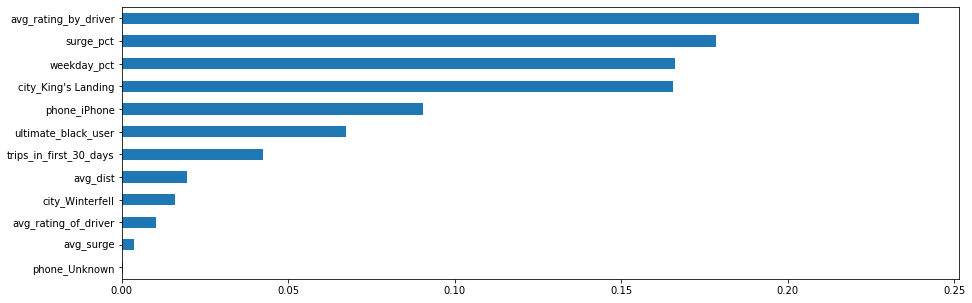

In [48]:
# examine feature importances of GBC model
feat_importances = pd.Series(gbc.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')

How can we interpret these most important features?
a) avg_rating_by_driver: Perhaps only users who use the service properly enjoy it enough to continue using it. Alternatively, it could be that the lower-rated users have a higher retention rate; the more often someone uses the service, the more likely they will have a bad experience with the driver. 

In [49]:
good_user = df_users[df_users['avg_rating_by_driver'] >= 4.7]
bad_user = df_users[df_users['avg_rating_by_driver'] < 4.7]
print('Good user retention rate: {}'.format(good_user['retained'].mean()))
print('Bad user retention rate: {}'.format(bad_user['retained'].mean()))

Good user retention rate: 0.35797832114948325
Bad user retention rate: 0.445595353339787


Users with lower ratings do use the service more often.

b) surge_pct: Maybe the users who ride at the busiest times are most likely to stay with the service. Or the surges discourage people from riding. 

In [50]:
df_users['surge_pct'].mean()

8.849535999999706

In [51]:
surge_user = df_users[df_users['surge_pct'] > 8.85]
normal_user = df_users[df_users['surge_pct'] <= 8.85]
print('Surge user retention rate: {}'.format(surge_user['retained'].mean()))
print('Normal user retention rate: {}'.format(normal_user['retained'].mean()))

Surge user retention rate: 0.5187600644122383
Normal user retention rate: 0.32892496008515165


Users who ride more during surges are more likely to be retained.
Let's examine how large these surges are and how they affect retention.

In [52]:
df_users['avg_surge'].mean()

1.0747637999999744

In [53]:
high_surge = df_users[df_users['avg_surge'] > 1.07]
low_surge = df_users[df_users['avg_surge'] <= 1.07]
print('High surge retention rate: {}'.format(high_surge['retained'].mean()))
print('Low surge retention rate: {}'.format(low_surge['retained'].mean()))

High surge retention rate: 0.5051067780872794
Low surge retention rate: 0.34065765995411673


Users who ride during higher than average surges are significantly more likely to continue use.

c) weekday_pct: My intuition is that those who have a higher percentage of weekday rides are more likely to be retained.

In [54]:
df_users['weekday_pct'].mean()

60.926083999999406

In [55]:
weekday_user = df_users[df_users['weekday_pct'] > 60.9]
weekend_user = df_users[df_users['weekday_pct'] <= 60.9]
print('Weekday user retention rate: {}'.format(weekday_user['retained'].mean()))
print('Other user retention rate: {}'.format(weekend_user['retained'].mean()))

Weekday user retention rate: 0.369928226160832
Other user retention rate: 0.38348316587343556


The rate of retention between the groups is comparable. Because the other user rate of retention is slightly higher, this could indicate that weekend riders are more likely to user the service in general.

### Recommendations:

The data analysis above related to surges indicates that Ultimate should increase both the frequency of surges and their multiplier. If they were to implement the changes, they could do A/B testing to measure impact, only changing one feature at a time.

The company should consider offering discounts/coupons on the weekend. If it works, then our analysis holds and they should see an increase in retention. If not, they should be looking at ways to incentivize more regular use on the weekdays, such as reward points.

There are some insights to be gained from the other features. 
There may be some characteristics of King's Landing that affect use, such as road quality or entertainment availability. Regardless, this should be examined in more depth so Ultimate can evaluate their level of investment in the city.

If iPhone users are more likely to continue use, this could show there is some difference from the Android version of the app that affects retention rate.

The correlation matrix also showed a relatively high degree of correlation of Ultimate Black use with retention rate, perhaps indicating they should be encouraging people to use this "luxury" service.